# Car Model Prediction from Sales Data

## Srujan Esanakarra

#### September 30, 2021

## 1) Data

The following data for U.S. vehical sales by model in 2019 and 2018 was curated from multiple sources. The sales numbers for each model were derived from reports from each manufacturer about their monthly and yearly vehicle sales for the U.S. in 2019 and 2018. A few such reports can be found at the following links:


1. https://acuraconnected.com/2020/01/06/acura-usa-december-2019-sales-report/
2. https://media.audiusa.com/en-us/releases/375
3. https://media.stellantisnorthamerica.com/newsrelease.do?id=20586&fIId=21465&mid=23
4. https://media.ford.com/content/dam/fordmedia/North%20America/US/2019/10/02/2019-sales-3q.pdf
5. https://hondanews.com/en-US/releases/release-807c080220275f828905387c4f002e91-record-light-truck-sales-lift-ahm-and-honda-brand-to-sales-increases-in-2019
6. https://pressroom.toyota.com/toyota-motor-north-america-reports-december-2019-year-end-sales/

The price for each model is the current advertised starting price for that model by the respective manufacturer, obtained from each manufacturer's website. The type of vehicle was also obtained from the manufacturers' websites.

The estimated MPG for each model is the combined city/highway MPG for that model reported by the U.S. Environmental Protection Agency (EPA), obtained from their website: https://fueleconomy.gov. The type of gas the vehicle uses was also obtained from this website.

The data gathered from all these sources was entered into an Excel workbook and the month-to-month and year-over-year change were calculated to obtain the final table.

The CSV file with the data and the other files for this homework, including images, are available at the Google Drive folder linked below, accessible with a LionMail account.

#### Google Drive Folder URL
https://drive.google.com/drive/folders/1yZecWYSobFP2Vc08zQPlDXr3lNsjf1gO?usp=sharing

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install ipython

In [1]:
import numpy as np
import pandas as pd

In [2]:
# remove percent sign from data
def percent_to_float(x):
    return float(x.strip('%'))

# read data into DataFrame
df = pd.read_csv("Car Sales By Model.csv", converters={'Change':percent_to_float, 'YTD Change':percent_to_float})
df.rename(columns={'Change':'Change (%)', 'YTD Change':'YTD Change (%)'}, inplace=True)
df.style.set_caption("Vehicle Sales By Model in U.S. 2019")

df

,Model,2019 Dec,2018 Dec,Change (%),YTD 2019,YTD 2018,YTD Change (%),Price,MPG,Type of Gas,Type of Vehicle
0,Ford F-Series,77033,87772,-12.24,896526,909330,-1.41,39895.0,21,Diesel,Truck
1,Ram Pickup,56825,60155,-5.54,633694,536980,18.01,34795.0,23,Diesel,Truck
2,Chevrolet Silverado,53785,54424,-1.17,575569,585582,-1.71,29300.0,21,Diesel,Truck
3,Toyota RAV4,41282,38669,6.76,448068,427168,4.89,26350.0,30,Regular,SUV
4,Honda CR-V,36098,42079,-14.21,384168,379021,1.36,25750.0,30,Regular,SUV
...,...,...,...,...,...,...,...,...,...,...,...
267,Porsche Taycan,130,0,0.00,130,0,0.00,82700.0,79,Electricity,Car
268,Chrysler 200,1,6,-83.33,48,1043,-95.40,24000.0,27,Regular,Car
269,Cadillac CT5,43,0,0.00,43,0,0.00,36995.0,25,Premium,Car
270,Jeep Patriot,2,9,-77.78,27,621,-95.65,19000.0,26,Regular,SUV


#### Pre-processing

The two class classification problem that I will approach with this data is the type of vehicle a given model is. Since there are few trucks and minivans and most vehicles are either cars or SUVs, I will merge trucks, minivans, vans, and SUVs into one class and call it SUVTM for ease and leave car as the second class.

In [3]:
# combine vehicle labels to form two classes
df.loc[df['Type of Vehicle'] == "SUV", 'Type of Vehicle'] = "SUVTM"
df.loc[df['Type of Vehicle'] == "Truck", 'Type of Vehicle'] = "SUVTM"
df.loc[df['Type of Vehicle'] == "Minivan", 'Type of Vehicle'] = "SUVTM"
df.loc[df['Type of Vehicle'] == "Van", 'Type of Vehicle'] = "SUVTM"

df

,Model,2019 Dec,2018 Dec,Change (%),YTD 2019,YTD 2018,YTD Change (%),Price,MPG,Type of Gas,Type of Vehicle
0,Ford F-Series,77033,87772,-12.24,896526,909330,-1.41,39895.0,21,Diesel,SUVTM
1,Ram Pickup,56825,60155,-5.54,633694,536980,18.01,34795.0,23,Diesel,SUVTM
2,Chevrolet Silverado,53785,54424,-1.17,575569,585582,-1.71,29300.0,21,Diesel,SUVTM
3,Toyota RAV4,41282,38669,6.76,448068,427168,4.89,26350.0,30,Regular,SUVTM
4,Honda CR-V,36098,42079,-14.21,384168,379021,1.36,25750.0,30,Regular,SUVTM
...,...,...,...,...,...,...,...,...,...,...,...
267,Porsche Taycan,130,0,0.00,130,0,0.00,82700.0,79,Electricity,Car
268,Chrysler 200,1,6,-83.33,48,1043,-95.40,24000.0,27,Regular,Car
269,Cadillac CT5,43,0,0.00,43,0,0.00,36995.0,25,Premium,Car
270,Jeep Patriot,2,9,-77.78,27,621,-95.65,19000.0,26,Regular,SUVTM


## 2A) Raw Feature Dimension Plots

In [4]:
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Image

#### Features: Price and YTD Sales in 2019

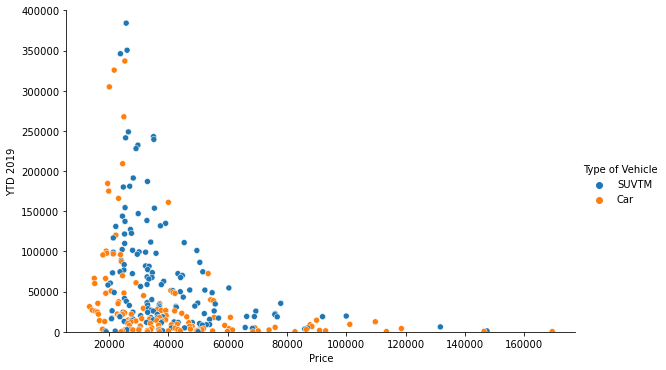

In [5]:
seaborn.relplot(data=df, x='Price', y='YTD 2019', hue='Type of Vehicle', aspect=1.61)
plt.ylim(0, 400000)
#plt.savefig('Price_YTD_2019.png')
plt.show()

##### Possible classifier:

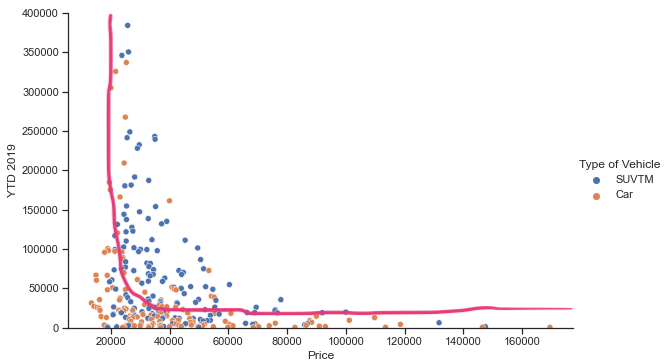

In [144]:
Image(filename='Price_YTD_2019.png')

#### Features: MPG and YTD Sales in 2019

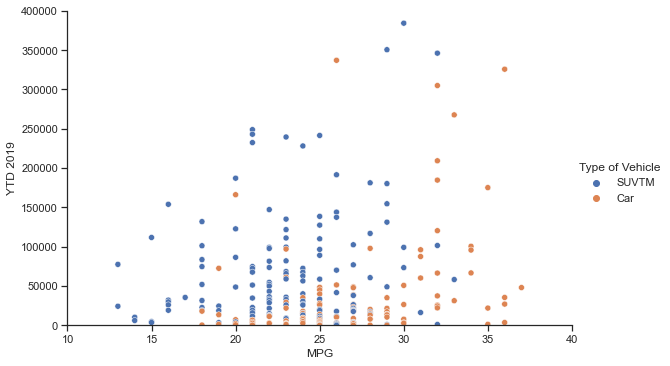

In [138]:
seaborn.relplot(data=df, x='MPG', y='YTD 2019', hue='Type of Vehicle', aspect=1.61)
plt.ylim(0, 400000)
plt.xlim(10,40)
#plt.savefig('MPG_YTD_2019.png')
plt.show()

##### Possible classifier:

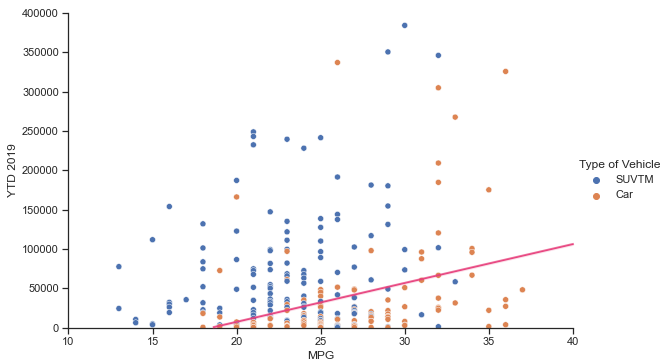

In [146]:
Image(filename='MPG_YTD_2019.png')

#### Features: YTD Change (%) from 2018 to 2019 and MPG

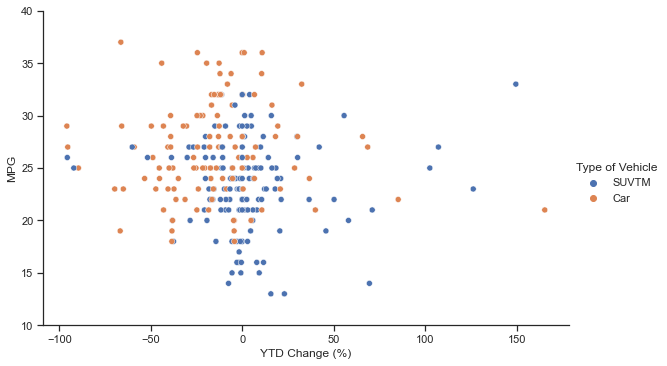

In [140]:
seaborn.relplot(data=df, x='YTD Change (%)', y='MPG', hue='Type of Vehicle', aspect=1.61)
plt.ylim(10, 40)
#plt.savefig('YTD_Change_MPG.png')
plt.show()

##### Possible Classifier:

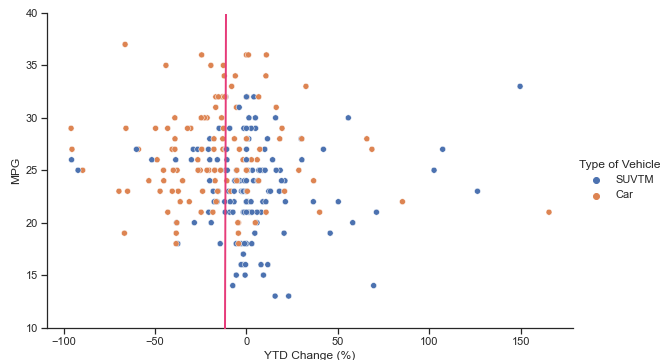

In [147]:
Image(filename='YTD_Change_MPG.png')

#### Features: YTD Change (%) from 2018 to 2019 and YTD sales in 2019

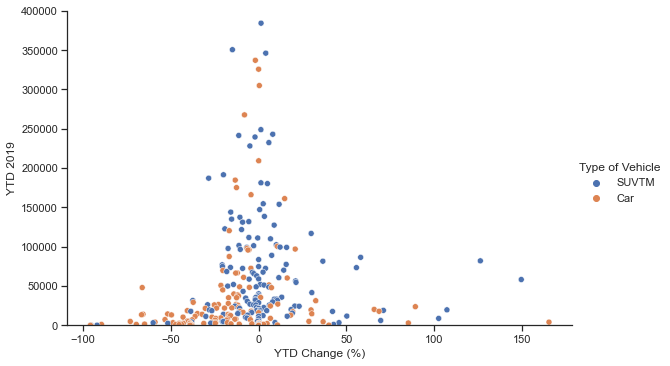

In [150]:
seaborn.relplot(data=df, x='YTD Change (%)', y='YTD 2019', hue='Type of Vehicle', aspect=1.61)
plt.ylim(0, 400000)
#plt.savefig('YTD_Change_YTD_2019.png')
plt.show()

##### Possible classifier:

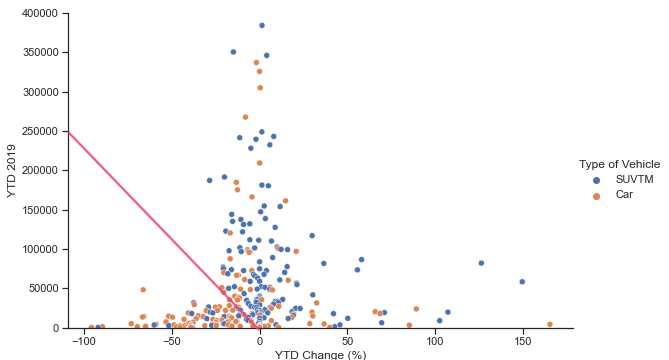

In [151]:
Image(filename='YTD_Change_YTD_2019.png')

From the plots above, it appears that YTD Sales in 2019, YTD Change (%) from 2018 to 2019, and MPG are the features that can best predict whether a given vehicle is a car or not. Of these features, YTD Sales and YTD Change (%) seem to both independently describe the classification better than MPG, and thus, they will be used for the model.

## 2B) Splitting Data

In [6]:
from itertools import chain

In [7]:
# encode vehicle labels with integers
df["Type of Vehicle"] = df["Type of Vehicle"].astype('category')
df["Label"] = df["Type of Vehicle"].cat.codes

# convert data for classification into numpy arrays
data_array = df[["YTD Change (%)", "YTD 2019"]].to_numpy()
labels = df["Label"].values

In [8]:
def _index(arr, indices):
    """
    function to return sub-arry from array and indices
    :param arr: array from which indices have to be obtained
    :param indices: indices to be obtained
    :return: sub-array from given array and indices
    """
    
    if hasattr(arr, 'shape'):
        return arr[indices]
    
    return [arr[idx] for idx in indices]

In [9]:
def train_test_split(*arrays, test_size=0.2, shuffle=True, random_seed=1):
    """
    function to split inputted arrays into training and test sets
    :param arrays: arrays to split into training and test sets
    :param test_size: size of test set in range (0,1)
    :param shuffle: shuffle arrays, yes or no
    :param random_seed: random seed value
    :return: return 2*len(arrays) divided into training and test sets
    """
    
    assert 0 < test_size < 1
    assert len(arrays) > 0
    length = len(arrays[0])
    for i in arrays:
        assert len(i) == length

    test_count = int(np.ceil(length*test_size))
    train_count = length - test_count

    if shuffle:
        perm = np.random.RandomState(random_seed).permutation(length)
        train_indices = perm[test_count:]
        test_indices = perm[:test_count]
    else:
        train_indices = np.arange(train_count)
        test_indices = np.arange(train_count, length)

    return list(chain.from_iterable((_index(arr, train_indices), _index(arr, test_indices)) for arr in arrays))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_array, labels)

## 3) Fitting Multivariate Gaussian Distributions

#### Class Priors

In [11]:
# calculate class priors for the two classes from the training data
num_cars = len(np.where(y_train == 0)[0].tolist())
num_suvtm = len(np.where(y_train == 1)[0].tolist())

car_prior = num_cars / (num_cars + num_suvtm)
suvtm_prior = num_suvtm / (num_cars + num_suvtm)

print(car_prior)
print(suvtm_prior)

0.47465437788018433
0.5253456221198156


Hereafter, $y_1$ will refer to the class "Car" and $y_2$ will refer to the class "SUVTM". <br><br>
Class Priors: <br>
$P(y_1)$ = 0.475 <br>
$P(y_2)$ = 0.525

#### Class Conditionals

In [12]:
def multivariate_normal(x, mean, cov):
    """
    PDF of the multivariate normal distribution
    :param x: sample x for PDF
    :param mean: mean of x
    :param cov: covariance of x
    :return: probability of x given these parameters
    """
    
    x_m = x - mean
    return ((1. / ((2 * np.pi)**(len(x)/2) * (np.linalg.det(cov))**(1/2))) * 
            np.exp(-((x_m).T @ np.linalg.inv(cov) @ (x_m)) / 2))

In [13]:
def mean(arr, axis=0):
    """
    function to calculate the mean of a given array
    :param arr: input array
    :param axis: which axis to calculate mean on, if 0(default), calculated across 
    each column
    :return: mean vector over given axis
    """
    shape = arr.shape
    if axis == 1:
        mean_vector = np.zeros(shape[0])
        for row in range(0,shape[0]):
            mean_vector[row] = np.sum(arr[row,:]) / shape[1]
    else:
        mean_vector = np.zeros(shape[1])
        for col in range(0,shape[1]):
            mean_vector[col] = np.sum(arr[:,col]) / shape[0]

    
    return mean_vector

In [14]:
def cov(arr, rowvar=True, bias=0):
    """
    function to calculate covariance of the given matrix
    :param arr: array to calculate covariance for
    :param rowvar (bool): if True(default), each column represents an observation 
    and each row represents a feature/variable
    :param bias: if False(default), normalized by (N - 1), where N is the number of 
    observations given (unbiased estimate); if True, normalized by N
    :return: covariance matrix
    """
    
    num_features = 0
    num_observations = 0
    
    if rowvar:
        num_features = arr.shape[0]
        num_observations = arr.shape[1]
        
        centered_arr = arr - mean(arr, axis=1).reshape(num_features,-1)
        
        return (centered_arr @ centered_arr.T)/(num_observations-1)
    else:
        num_features = arr.shape[1]
        num_observations = arr.shape[0]
        
        centered_arr = arr - mean(arr, axis=0).reshape(-1,num_features)
        return (centered_arr.T @ centered_arr)/(num_observations-1)

In [15]:
# separate training data to calculate mean and covariance for each class
car_indices = np.where(y_train == 0)
suvtm_indices = np.where(y_train == 1)

car_array = np.take(X_train, car_indices[0].tolist(), 0)
suvtm_array = np.take(X_train, suvtm_indices[0].tolist(), 0)

In [16]:
# estimated parameters for class "Car"
car_mean = mean(car_array, axis=0)
car_cov = cov(car_array, rowvar=0)

In [17]:
# estimated parameters for class "SUVTM"
suvtm_mean = mean(suvtm_array, axis=0)
suvtm_cov = cov(suvtm_array, rowvar=0)

#### Bayes Theorem

$P(y_1|{\bf x}) = \frac{P({\bf x}|y_1) \cdot P(y_1)}{P{\bf x}}$ <br>
$P(y_1|{\bf x}) = \frac{\text{multivariate_normal}({\bf x}, \mu_{y_1}, \Sigma_{y_1}) \cdot P(y_1)}{P{\bf x}}$

$P(y_2|{\bf x}) = \frac{P({\bf x}|y_2) \cdot P(y_2)}{P{\bf x}}$ <br>
$P(y_2|{\bf x}) = \frac{\text{multivariate_normal}({\bf x}, \mu_{y_2}, \Sigma_{y_2}) \cdot P(y_2)}{P{\bf x}}$

Since the ${P{\bf x}}$ is independent of the class, we can classify based on the class conditional and class prior.

#### Naive Bayes Classification

In [18]:
def calc_probs(data):
    """
    function to calculate the probabilities for each class according to Bayes 
    Theorem
    :param data: data to calculate probabilities for
    :return: probabilities for each class and classification in last column by 
    maximum likelihood estimate
    """
    probabilities = np.zeros((len(data), 3))

    for t in range(len(data)):
        probabilities[t][0] = multivariate_normal(np.asmatrix(data[t]).T, np.asmatrix(car_mean).T, car_cov) * car_prior
        probabilities[t][1] = multivariate_normal(np.asmatrix(data[t]).T, np.asmatrix(suvtm_mean).T, suvtm_cov) * suvtm_prior

    for row in probabilities:
        if row[0] > row[1]:
            row[2] = 0
        else:
            row[2] = 1
    
    return probabilities

In [19]:
# calculate probabilities for test data
probabilities = calc_probs(X_test)

# classification by model for test data
predictions = probabilities[:,2].astype(int)

#### Model Accuracy

In [20]:
# accuracy of model
accuracy = np.sum(predictions == y_test) / len(y_test)

print("Accuracy of Model on Test Data: ", str(round(accuracy*100,2)), "%")

Accuracy of Model on Test Data:  63.64 %


#### Plot of Test Data and Predicted Classification

In [21]:
# create DataFrame from test data and results from classification model for plotting
test_df = pd.DataFrame(X_test, columns=['YTD Change (%)', 'YTD 2019'])
test_df['Label'] = y_test.tolist()
test_df['Predicted Label'] = predictions.tolist()
test_df.astype({'Label': 'int', 'Predicted Label': 'int'}).dtypes

for index, row in test_df.iterrows():
    if row['Label'] == 0:
        test_df.loc[index,'Type of Vehicle'] = 'Car'
    else:
        test_df.loc[index,'Type of Vehicle'] = 'SUVTM'
    if row['Predicted Label'] == 0:
        test_df.loc[index,'Predicted Type of Vehicle'] = 'Car'
    else:
        test_df.loc[index,'Predicted Type of Vehicle'] = 'SUVTM'

test_df.head()

,YTD Change (%),YTD 2019,Label,Predicted Label,Type of Vehicle,Predicted Type of Vehicle
0,-40.57,5528.0,0,0,Car,Car
1,-1.11,62876.0,1,0,SUVTM,Car
2,-48.85,3378.0,0,0,Car,Car
3,-1.69,35424.0,1,0,SUVTM,Car
4,1.28,248801.0,1,1,SUVTM,SUVTM


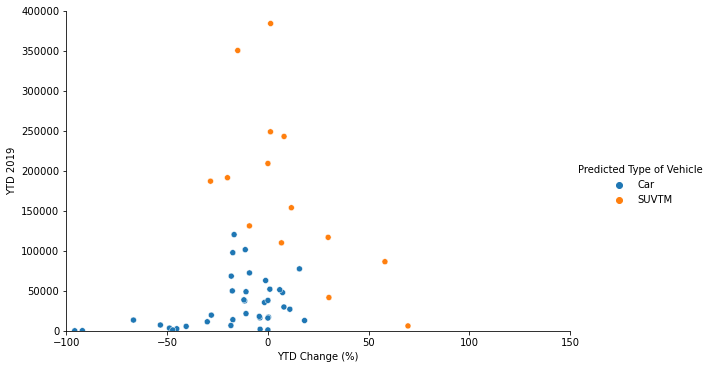

In [22]:
seaborn.relplot(data=test_df, x='YTD Change (%)', y='YTD 2019', hue='Predicted Type of Vehicle', aspect=1.61)
plt.ylim(0, 400000)
plt.xlim(-100,150)
#plt.savefig('Test_Data_Plot.png')
plt.show()

#### Hand-drawn Decision Boundary

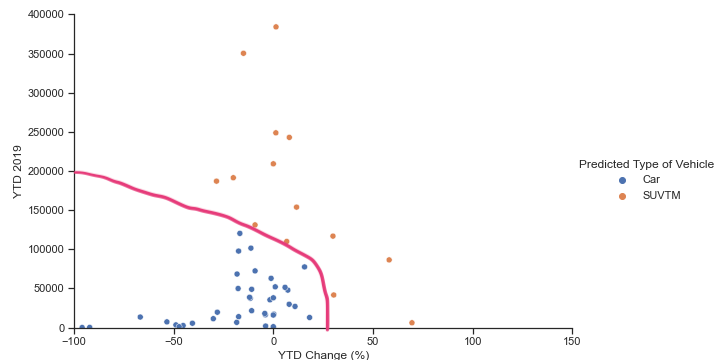

In [405]:
Image(filename='Test_Data_Plot.png')

#### Sampling

In [23]:
# Densely sampling feature space to determine decision boundary; total 25000 points
num_samples = 100
i = -100
j = -99
samples = np.zeros((1,2))
for k in range(0,250):
    temp = np.linspace(start=[i, 0], stop=[j,400000], num=num_samples)
    samples = np.vstack((samples,temp))
    i += 1
    j += 1

In [24]:
# Classification by model for sample points
sample_probs = calc_probs(samples)
sample_preds = sample_probs[:,2].astype(int)

In [25]:
# DataFrame from sample points and predicted classification for plotting
sample_df = pd.DataFrame(samples, columns=['YTD Change (%)', 'YTD 2019'])
sample_df['Predicted Label'] = sample_preds.tolist()
sample_df.astype({'Predicted Label': 'int'}).dtypes

for index, row in sample_df.iterrows():
    if row['Predicted Label'] == 0:
        sample_df.loc[index,'Predicted Type of Vehicle'] = 'Car'
    else:
        sample_df.loc[index,'Predicted Type of Vehicle'] = 'SUVTM'

sample_df.head()

,YTD Change (%),YTD 2019,Predicted Label,Predicted Type of Vehicle
0,0.000000,0.000000,0,Car
1,-100.000000,0.000000,0,Car
2,-99.989899,4040.404040,0,Car
3,-99.979798,8080.808081,0,Car
4,-99.969697,12121.212121,0,Car


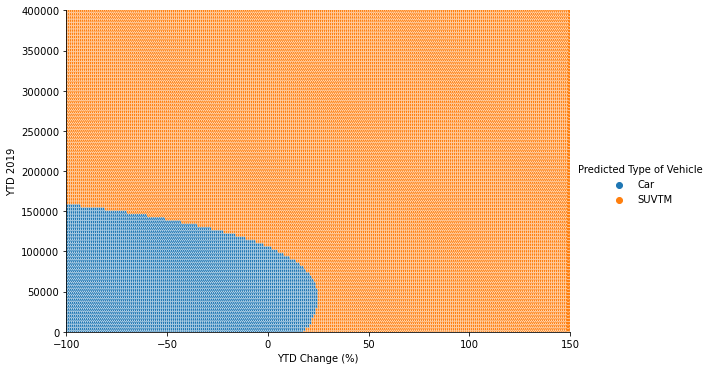

In [26]:
# Plot for data from densely sampling feature space
seaborn.relplot(data=sample_df, x='YTD Change (%)', y='YTD 2019', hue='Predicted Type of Vehicle', aspect=1.61)
plt.ylim(0, 400000)
plt.xlim(-100,150)
#plt.savefig('YTD_Change_YTD_2019.png')
plt.show()

#### Discussion

The decision boundary for the minimum error rate classifier based on the car sales data fit to a multivariate normal model appears to be a relatively good fit for the data. While the data is not completely linearly separable, from the initial exploration, it was evident that the two chosen features can reasonably separate the two classes of the data as both the classes were concentrated around different values of the features.<br>

The hand drawn decision boundary for the test data is very similar to the decision boundary generated by densely sampling the space. However, the hand drawn boundary predicted a higher YTD Sales cutoff for cars than the actual decision boundary generated by the model. The general shape and area of the boundary, however, is very similar, showing that the model is consistent.<br>

The decision boundary from the model does a relatively satisfactory job of classifying the data, providing the insight that cars are seeing a decline in both volume sold and year over year sales, while SUVs, trucks, and minivans are seeing an increase in volume sold and year over year sales, which is consistent with the demand in the market for these vehicles. 